In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from wordcloud import WordCloud
# from collections import Counter
# from langdetect import detect

# **BBC NEWS**

In [2]:
base_path = "/kaggle/input/bbc-news-summary/BBC News Summary"
article_path = os.path.join(base_path, "News Articles")
summary_path = os.path.join(base_path, "Summaries")

In [3]:
categories = os.listdir(article_path)

In [4]:
data = []

In [5]:
for category in categories:
    article_dir = os.path.join(article_path, category)
    summary_dir = os.path.join(summary_path, category)
    
    for fname in os.listdir(article_dir):
        article_file = os.path.join(article_dir, fname)
        summary_file = os.path.join(summary_dir, fname)

        with open(article_file, "r", encoding="utf-8", errors='ignore') as af:
            article = af.read().strip()

        with open(summary_file, "r", encoding="utf-8", errors='ignore') as sf:
            summary = sf.read().strip()

        data.append({
            "category": category,
            "file_name": fname,
            "article": article,
            "summary": summary
        })
df = pd.DataFrame(data)

# Tổng quan dữ liệu

In [6]:
print(df.shape)
df.head()

(2225, 4)


,category,file_name,article,summary
0,politics,361.txt,Budget to set scene for election\n\nGordon Bro...,- Increase in the stamp duty threshold from £6...
1,politics,245.txt,Army chiefs in regiments decision\n\nMilitary ...,"""They are very much not for the good and will ..."
2,politics,141.txt,Howard denies split over ID cards\n\nMichael H...,Michael Howard has denied his shadow cabinet w...
3,politics,372.txt,Observers to monitor UK election\n\nMinisters ...,The report said individual registration should...
4,politics,333.txt,Kilroy names election seat target\n\nEx-chat s...,"UKIP's leader, Roger Knapman, has said he is g..."


# Phân bố số lượng theo category

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


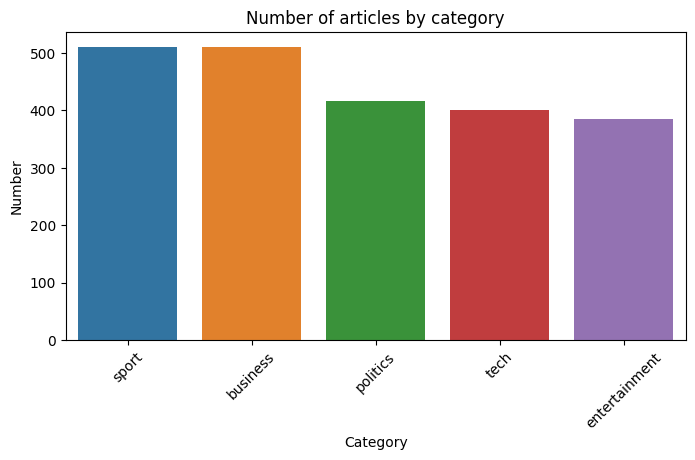

In [7]:
category_counts = df["category"].value_counts()
print(category_counts)

plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Number of articles by category")
plt.ylabel("Number")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


# Độ dài bài báo và tóm tắt

In [8]:
df["article_len"] = df["article"].apply(lambda x: len(x.split()))
df["summary_len"] = df["summary"].apply(lambda x: len(x.split()))

print(df[["article_len", "summary_len"]].describe())

       article_len  summary_len
count  2225.000000  2225.000000
mean    384.040449   165.166742
std     238.174497   108.655971
min      89.000000    38.000000
25%     246.000000   103.000000
50%     332.000000   142.000000
75%     471.000000   202.000000
max    4432.000000  2073.000000


# Tỉ lệ tóm tắt / gốc (độ nén)

In [9]:
df["compression_ratio"] = df["summary_len"] / df["article_len"]
print(df["compression_ratio"].describe())

count    2225.000000
mean        0.430170
std         0.050561
min         0.208889
25%         0.399194
50%         0.429158
75%         0.460317
max         0.683036
Name: compression_ratio, dtype: float64


# Kiểm tra dữ liệu rỗng hoặc lỗi

In [10]:
num_unique = df.nunique()

print(num_unique)

category                5
file_name             511
article              2127
summary              2081
article_len           628
summary_len           341
compression_ratio    1839
dtype: int64


In [11]:
print("Number of articles null :", df["article"].apply(lambda x: x.strip() == "").sum())
print("Number of summaries null:", df["summary"].apply(lambda x: x.strip() == "").sum())

print("len article < 20 words:", (df["article_len"] < 20).sum())
print("len summary < 5 words:", (df["summary_len"] < 5).sum())


Number of articles null : 0
Number of summaries null: 0
len article < 20 words: 0
len summary < 5 words: 0


# Check duplicate

In [12]:
duplicate_articles = df[df.duplicated("article", keep=False)]
print(f"Số bài bị trùng nội dung gốc: {len(duplicate_articles)}")

conflict_summary = duplicate_articles.groupby("article").filter(lambda x: len(x["summary"].unique()) > 1)
print(f"Số bài bị tóm tắt mâu thuẫn: {len(conflict_summary)}")


Số bài bị trùng nội dung gốc: 196
Số bài bị tóm tắt mâu thuẫn: 0


# **VNNews**

In [13]:
base_path_2 = "/kaggle/input/vietnamese-news-summary"
article_path_2 = os.path.join(base_path_2, "Plaintext")
summary_path_2 = os.path.join(base_path_2, "Summary_manual")

In [14]:
categories_vi = os.listdir(article_path_2)
data_vi = []

In [15]:
for category in categories_vi:
    article_dir = os.path.join(article_path_2, category)
    summary_dir = os.path.join(summary_path_2, category)

    for fname in os.listdir(article_dir):
        article_file = os.path.join(article_dir, fname)
        summary_file = os.path.join(summary_dir, fname)

        # Đảm bảo file tồn tại ở cả 2 folder
        if not os.path.exists(summary_file):
            continue

        with open(article_file, "r", encoding="utf-8", errors='ignore') as af:
            article = af.read().strip()

        with open(summary_file, "r", encoding="utf-8", errors='ignore') as sf:
            summary = sf.read().strip()

        data_vi.append({
            "category": category,
            "file_name": fname,
            "article": article,
            "summary": summary
        })

df_vi = pd.DataFrame(data_vi)

# Tổng quan dữ liệu

In [16]:
print("Tổng số mẫu:", len(df_vi))
print("Các chuyên mục:", df_vi['category'].unique())
df_vi.head()

Tổng số mẫu: 169
Các chuyên mục: ['Xa Hoi' 'khoahoc_giaoduc' 'boKHCN' 'kinhte' 'Van Hoa']


,category,file_name,article,summary
0,Xa Hoi,XH14.txt,﻿ Mối hiểm nguy từ việc nuôi chim yến trong k...,﻿Trước thông tin dịch cúm H5N1 trên đàn chim y...
1,Xa Hoi,XH35.txt,﻿Cần tăng lương vào thời điểm hợp lý\n\nTrong ...,Trong báo cáo dự toán ngân sách 2013 trình bày...
2,Xa Hoi,XH33.txt,﻿Biển Đông ‘nóng’ trên bàn nghị sự ASEAN\n\nTạ...,"Trong cuộc họp Bộ trưởng ngoại giao ASEAN, các..."
3,Xa Hoi,XH06.txt,"﻿ 110 chú rùa con về với biển\n Tối 21/7, tại ...","﻿Tối 21/7, tại khu bãi Ngòi thuộc thôn Hậu Gia..."
4,Xa Hoi,XH34.txt,﻿Trang bị ‘mắt thần’ cho Cảnh sát biển Việt Na...,"Đúng 11 giờ 35 phút ngày 26-1, chiếc máy bay t..."


# Phân bố theo chuyên mục

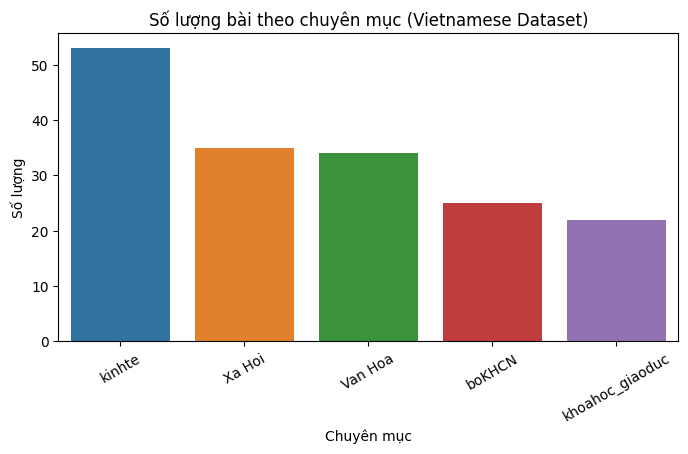

In [17]:
cat_counts = df_vi['category'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=cat_counts.index, y=cat_counts.values)
plt.title("Số lượng bài theo chuyên mục (Vietnamese Dataset)")
plt.xticks(rotation=30)
plt.ylabel("Số lượng")
plt.xlabel("Chuyên mục")
plt.show()

# Độ dài article và summary

In [18]:
df_vi["article_len"] = df_vi["article"].apply(lambda x: len(x.split()))
df_vi["summary_len"] = df_vi["summary"].apply(lambda x: len(x.split()))

print(df_vi[["article_len", "summary_len"]].describe())

       article_len  summary_len
count   169.000000   169.000000
mean    730.384615   139.100592
std     306.889619    30.536989
min     217.000000    55.000000
25%     522.000000   123.000000
50%     669.000000   138.000000
75%     852.000000   159.000000
max    2224.000000   243.000000


# Tỷ lệ nén

In [19]:
df_vi["compression_ratio"] = df_vi["summary_len"] / df_vi["article_len"]
print(df_vi["compression_ratio"].describe())

count    169.000000
mean       0.215210
std        0.082948
min        0.046313
25%        0.168911
50%        0.201691
75%        0.251748
max        0.486239
Name: compression_ratio, dtype: float64


# Kiểm tra lỗi – trống, trùng

In [20]:
print("Số bài bị trống:", (df_vi['article'].str.strip() == '').sum())
print("Số bài tóm tắt trống:", (df_vi['summary'].str.strip() == '').sum())

# Trùng lặp
print("Số bài article trùng nhau:", df_vi.duplicated("article").sum())

Số bài bị trống: 0
Số bài tóm tắt trống: 0
Số bài article trùng nhau: 8


# Preprocess

In [21]:
base_path = "/kaggle/input/bbc-news-summary/BBC News Summary"
article_dir = os.path.join(base_path, "News Articles")
summary_dir = os.path.join(base_path, "Summaries")

In [22]:
def read_file(path):
    try:
        with open(path, "r", encoding="utf-8") as f:
            return f.read().strip()
    except UnicodeDecodeError:
        with open(path, "r", encoding="latin1") as f:
            return f.read().strip()

In [23]:
data_bbc = []

for category in os.listdir(article_dir):
    article_cat_path = os.path.join(article_dir, category)
    summary_cat_path = os.path.join(summary_dir, category)

    for file in os.listdir(article_cat_path):
        article_path = os.path.join(article_cat_path, file)
        summary_path = os.path.join(summary_cat_path, file)

        article = read_file(article_path)
        summary = read_file(summary_path)

        # Prompt tối giản, không có token đặc biệt
        prompt = f"""You are a helpful summarization assistant. Summarize the following article in 150 words: {article} Summary: """

        data_bbc.append({
            "prompt": prompt,
            "article": article,
            "summary": summary
        })


In [24]:
pd.set_option('display.max_colwidth', None)

In [25]:
df_bbc = pd.DataFrame(data_bbc)
df_bbc.sample(1)

,prompt,article,summary
1896,"You are a helpful summarization assistant. Summarize the following article in 150 words: Iran budget seeks state sell-offs\n\nIran's president, Mohammad Khatami, has unveiled a budget designed to expand public spending by 30% but loosen the Islamic republic's dependence on oil.\n\nThe budget for the fiscal year starting on 21 March calls for the sell-off of 20% of the state's corporate holdings. Mr Khatami's second term as president ends on 1 August, making this his last budget. But opposition from members of parliament who have attacked previous privatisations could block his plans. Elections in May 2004 ousted many of Mr Khatami's supporters in parliament in favour of more hard-line religious conservatives. Late last year, they backed a law which would give parliament a veto over foreign investment. The ruling was a response to the involvement in telecoms and airport projects by Turkish companies, which hardliners accused of doing business with Israel. It came not long after the Expediency Council - Iran's ultimate decision-maker - blessed Mr Khatami's policy of selling stakes in sectors protected by the constitution such as energy, transport, telecoms and banking. Continued obstruction of foreign investment could get in the way not only of privatisation plans, but also of Mr Khatami's hope of modestly reducing the government's reliance on oil revenues.\n\nIn an address to the Majlis, Mr Khatami predicted economic growth of 7.1% in 2005-6, up from 6.7% in the current year. He said he wanted to increase the 2005-6 budget to 1,546 trillion rials ($175.6bn; £93.6bn) from the previous year's 1,070 trillion. Within that figure, taxation would rise to $14.3bn, a rise of over 40% from what is expected from the current year. In contrast, oil revenues were expected to fall to $14.1bn from $16bn in the year to March 2005. ""Current government expenditure should come from tax revenues,"" Mr Khatami said. ""Oil revenues should be used for productive investment."" Mr Khatami has already been blocked by parliament from reducing the subsidies on many products including bread and petrol, reducing his room to manoeuvre. Summary:","Iran budget seeks state sell-offs\n\nIran's president, Mohammad Khatami, has unveiled a budget designed to expand public spending by 30% but loosen the Islamic republic's dependence on oil.\n\nThe budget for the fiscal year starting on 21 March calls for the sell-off of 20% of the state's corporate holdings. Mr Khatami's second term as president ends on 1 August, making this his last budget. But opposition from members of parliament who have attacked previous privatisations could block his plans. Elections in May 2004 ousted many of Mr Khatami's supporters in parliament in favour of more hard-line religious conservatives. Late last year, they backed a law which would give parliament a veto over foreign investment. The ruling was a response to the involvement in telecoms and airport projects by Turkish companies, which hardliners accused of doing business with Israel. It came not long after the Expediency Council - Iran's ultimate decision-maker - blessed Mr Khatami's policy of selling stakes in sectors protected by the constitution such as energy, transport, telecoms and banking. Continued obstruction of foreign investment could get in the way not only of privatisation plans, but also of Mr Khatami's hope of modestly reducing the government's reliance on oil revenues.\n\nIn an address to the Majlis, Mr Khatami predicted economic growth of 7.1% in 2005-6, up from 6.7% in the current year. He said he wanted to increase the 2005-6 budget to 1,546 trillion rials ($175.6bn; £93.6bn) from the previous year's 1,070 trillion. Within that figure, taxation would rise to $14.3bn, a rise of over 40% from what is expected from the current year. In contrast, oil revenues were expected to fall to $14.1bn from $16bn in the year to March 2005. ""Current government expenditure should come from tax reven

In [26]:
base_path_2 = "/kaggle/input/vietnamese-news-summary"
article_dir_2 = os.path.join(base_path_2, "Plaintext")
summary_dir_2 = os.path.join(base_path_2, "Summary_manual")

In [27]:
data_vie = []

for category in os.listdir(article_dir_2):
    article_cat_path = os.path.join(article_dir_2, category)
    summary_cat_path = os.path.join(summary_dir_2, category)

    for file in os.listdir(article_cat_path):
        article_path = os.path.join(article_cat_path, file)
        summary_path = os.path.join(summary_cat_path, file)
        if not os.path.exists(summary_path):
            continue  # Bỏ qua nếu thiếu file

        article = read_file(article_path)
        summary = read_file(summary_path)

        # Prompt tối ưu cho LLaMA 3.2 1B (không có token đặc biệt)
        prompt = f"""Bạn là một trợ lý tóm tắt văn bản. Hãy cung cấp bản tóm tắt ngắn gọn và chính xác trong 150 chữ cho bài viết sau. Bài viết: {article} Tóm tắt: """
        data_vie.append({
            "prompt": prompt,
            "article": article,
            "summary": summary
        })


In [28]:
df_vi = pd.DataFrame(data_vie)
df_vi.sample(2)

,prompt,article,summary
35,"Bạn là một trợ lý tóm tắt văn bản. Hãy cung cấp bản tóm tắt ngắn gọn và chính xác trong 150 chữ cho bài viết sau. Bài viết: ﻿Thí sinh 29,5 điểm ĐH Dược Hà Nội đặt mục tiêu thủ khoa “kép”\nVừa nhận tin là người có điểm số cao nhất khối A vào Trường ĐH Dược Hà Nội, cậu học trò làng gốm Bát Tràng Nguyễn Thanh Tùng đã đặt mục tiêu sẽ giành ngôi vị thủ khoa đầu ra của ngôi trường nơi em nuôi ước mơ trở thành một dược sĩ điều chế thuốc. \nNguyễn Thanh Tùng vẫn còn rất xúc động khi biết mình đã trở thành thủ khoa đầu vào ĐH Dược Hà Nội năm nay với số điểm 29,5 - điểm số khối A cao nhất cả nước tính tới thời điểm hiện tại.\nTùng cho biết, bố mẹ rất vui mừng và tự hào về em, bạn bè liên tục nhắn tin chúc mừng kể từ khi điểm được công bố ngày 20/7. Mừng niềm vui đỗ thủ khoa, Tùng tự thưởng cho mình một kỳ nghỉ ngắn, vui chơi thoải mái để sẵn sàng bắt nhịp với lịch học tập mới. Tùng cho biết, ngay khi nhận được tin vui, người đầu tiên em chia sẻ là cha mẹ.\nNguyễn Thanh Tùng sinh ra ở làng gốm Bát Tràng (Gia Lâm, Hà Nội). Cha mẹ em quanh năm làm gốm sứ. Một mình ra Hà Nội học tại Trường THPT Chuyên ĐH Sư phạm Hà Nội, ban đầu Tùng rất nhớ nhà nhưng vì thương cha mẹ nên tự nhủ phải tự lập, học tập thật tốt.\nBố mẹ chính là động lực, cũng là thần tượng của Tùng từ bé tới giờ. Được trở thành niềm tự hào của bố mẹ là niềm hạnh phúc đối với Tùng.\nTùng kể lại, sau khi làm xong bài thi ĐH khối A, em về nhà kiểm tra lại, so sánh với đáp án của Bộ GD-ĐT thì dự đoán bài được khoảng 28 - 28,5 điểm. Do vậy, Tùng rất bất ngờ khi biết được kết quả chính thức.\nTrong ba môn thi, Tùng tự tin nhất với môn Toán và Hóa, với em, đề Lý tương đối khó nên em không nghĩ mình được điểm cao. Tuy nhiên, bạn bè và cô giáo của Tùng đều cho biết rằng Tùng là một học sinh giỏi đều cả ba môn học, thường xuyên có mặt trong top học sinh khá giỏi nhất lớp.\nNăm lớp 12, Nguyễn Thanh Tùng đạt điểm tổng kết trung bình các môn là 8,9. Không chỉ giỏi môn tự nhiên, Tùng học khá đều các môn và đạt 52,5 điểm trong kỳ thi tốt nghiệp THPT vừa qua.\nTừ lâu, Tùng đã thổ lộ với mọi người ước mơ trở thành một dược sĩ điều chế thuốc cứu người, chính vì vậy, cả hai hồ sơ đăng ký thi ĐH của Tùng đều thi vào trường Y và trường Dược.\nKỳ thi đợt 2, Tùng thi khối B vào ĐH Y Hà Nội. Tuy nhiên, Tùng chia sẻ rằng nếu đậu cả hai trường, em sẽ theo học ĐH Dược Hà Nội. Và cậu học trò này cũng không giấu diếm quyết tâm cố gắng học tập để trở thành thủ khoa kép - không chỉ đỗ đầu kỳ thi tuyển sinh mà cả kỳ thi tốt nghiệp tại trường ĐH Dược Hà Nội trong tương lai.\nChia sẻ bí quyết học tập, Tùng cho rằng học sinh không cần phải đi luyện ở các trung tâm dạy thi vì như vậy vừa tốn thời gian, sức khoẻ lại không đạt được hiệu quả cao như mong muốn.\nĐối với từng môn học, Tùng có phương pháp riêng để luyện tập. Môn Toán, Tùng tập trung vào việc giải đề và làm nhiều dạng bài tập. Với môn Hóa, Tùng chú ý đến việc học lý thuyết trong sách giáo khoa, còn Vật lý thì cố gắng giải nhiều bài khó trên mạng.\nBí quyết của Tùng là dành ra 5 - 6 giờ một ngày để học tập. Lúc học tập trung hết mức có thể. Sau đó, Tùng thường thư giãn với các môn thể thao yêu thích, đặc biệt là bóng đá. Thể thao giúp em có cơ thể khoẻ mạnh và đầu óc minh mẫn để tiếp thu bài tốt hơn. Ngoài ra, Tùng cũng có thể tham gia các hoạt động văn nghệ ở trường như diễn kịch.\nĐể đối phó với áp lực khi đi thi, Tùng khuyên rằng các sĩ tử nên làm quen với môi trường phòng thi từ trước đó, thông qua những buổi thi thử. Việc này giúp các bạn có cảm nhận rõ ràng về cách thức cuộc thi diễn ra và làm quen với ""bầu không khí"" phòng thi. ""Điều quan trọng nhất là phải thật bình tĩnh khi bước vào làm bài"", chàng thủ khoa nhấn mạnh. Tóm tắt:","﻿Thí sinh 29,5 điểm ĐH Dược Hà Nội đặt mục tiêu thủ khoa “kép”\nVừa nhận tin là người có điểm số cao nhất khối A vào Trường ĐH Dược Hà Nội, cậu học trò làng gốm Bát Tràng Nguyễn Thanh Tùng đã đặt mục tiêu sẽ giành ngôi vị thủ khoa đầu ra của ngôi trường nơi em nuôi ước mơ trở thành một dượ

In [29]:
df_bbc = df_bbc.drop_duplicates(subset=["article", "summary"])
df_vi = df_vi.drop_duplicates(subset=["article", "summary"])

In [30]:
df_bbc.to_json("bbc_data_llama_finetune.json", orient="records", lines=True, force_ascii=False)
df_vi.to_json("vi_data_llama_finetune.json", orient="records", lines=True, force_ascii=False)